## CAPSTONE PROJECT ON CUSTOMER SUBSCRIPTION 

In [3]:
#Importing Relevant libraries and the dataset to work with
import pandas as pd
r = pd.read_csv('SB.csv')

r

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


### Data Cleaning 

In [56]:
#Check for and delete any missing Values
print("Missing values:")
print(r.isnull().sum())

Missing values:
Customer ID               0
Age                       0
Gender                    0
Product                   0
Category                  0
Price(USD)                0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
Z_Purchase                0
dtype: int64


There are no missing or null values

In [52]:
#Identifying duplicates in the Unique identifiers if any 
# Identify the duplicates
Duplicates = r[r['Customer ID'].duplicated()]
print(Duplicates)

#Confirming Unique rows by Removing duplicates
Unique = r.drop_duplicates()
print("Number of unique rows:", Unique.shape)

Empty DataFrame
Columns: [Customer ID, Age, Gender, Product, Category, Price(USD), Location, Size, Color, Season, Review Rating, Subscription Status, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Payment Method, Frequency of Purchases, Z_Purchase]
Index: []
Number of unique rows: (3900, 19)


There are no duplicate values

In [5]:
#Renaming Columns
r.rename(columns={'Purchase Amount (USD)': 'Price(USD)'}, inplace = True)
r.rename(columns ={'Item Purchased': 'Product'}, inplace = True)
r.rename(columns={'Price(USD)': 'Price'}, inplace = True)
#Checking the data types and correcting any Anomalies
print(r.dtypes)


Customer ID                 int64
Age                         int64
Gender                     object
Product                    object
Category                   object
Price                       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object


In [16]:
#Detecting Outliers in the dataset using Z-Score
from scipy.stats import zscore
r['Z_Purchase'] = zscore(r['Previous Purchases'])
outliers = r[r['Z_Purchase'].abs() > 3]
print(outliers)

Empty DataFrame
Columns: [Customer ID, Age, Gender, Product, Category, Price, Location, Size, Color, Season, Review Rating, Subscription Status, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Payment Method, Frequency of Purchases, Customer_Segment, Customer_Category, Age group, Z_Purchase]
Index: []

[0 rows x 22 columns]


All the columns with integer or numeric datatypes should be subjected to this test. If it returns an empty df, there are no Outliers. There are no Outliers in this dataset

### Data Transformation

In [17]:
#Determining the min and max age before categoring 
Minim = r['Age'].min()
print(Minim)
#Categorizing
r['Age group'] = pd.cut(r['Age'], bins=[0,12,19,40,50,100], labels= ['Child','Teenager','Young adult','Adult',
                                                                     'Older Adult'], include_lowest = True)
A= r[['Age','Age group']]

18


Using Feature engineering to convert Age into Age groups 

In [16]:
#Determining the min and max price before categoring 
Minim = r['Price'].min()
print(Minim)
#Categorizing
r['Customer_Category'] = pd.cut(r['Price'], bins= [0,30,50,100], labels= ['Cheap Buyers', 'Budget Buyers', 'Luxury Buyers'],
                                                                            include_lowest = True)
B= r[['Price', 'Customer_Category']]

20


Using Feature engineering to categorize customers based on the amount they spend on the products 

### Data Modelling

Customer Segmentation with K_Means in order to group customers based on similar behaviour(spending, purchases and demographics)

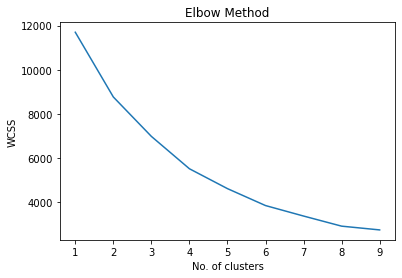

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Select clustering Features
features = r[['Age', 'Previous Purchases', 'Price']]
#Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
#Choose number of clusters using the elbow method
wcss= []
for k in range(1,10):
    kmeans=KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()
#Fit final Model
kmeans=KMeans(n_clusters=3, random_state=42)
r['Customer_Segment']=kmeans.fit_predict(scaled_features)

Customers have been put into clusters 0,1 or 2 based on their spending habit, their Age and the amount that they typically spend on shopping

Budget        1478
Loyal Big     1292
Occasional    1130
Name: Segment Label, dtype: int64


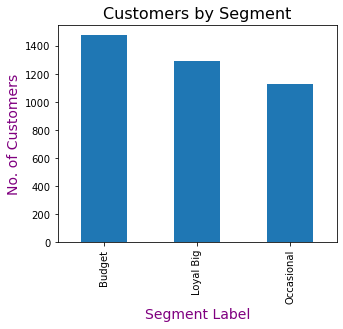

In [8]:
r.groupby('Customer_Segment')[['Age', 'Price', 'Previous Purchases']].mean()
#r['Customer_Segment'] = r['Customer_Segment'].replace({0: 'Budget', 1: 'Loyal Big', 2: 'Occasional'})
segment_map= {0: 'Budget', 1: 'Loyal Big', 2: 'Occasional'}
r['Segment Label']= r['Customer_Segment'].map(segment_map)

C=r['Segment Label'].value_counts()
print(C)

import seaborn as sns
plt.figure(figsize=(5,4))
r['Segment Label'].value_counts().plot(kind='bar')
plt.title('Customers by Segment', size = 16)
plt.xlabel('Segment Label', color = 'purple', size = 14)
plt.ylabel('No. of Customers', color = 'purple', size = 14)
plt.grid(False)
plt.show

segment_map= {0: 'Budget', 1: 'Loyal Big', 2: 'Occasional'}
r['Segment Label']= r['Customer_Segment'].map(segment_map)

#Calculating the amount of passengers in each group
social_status_group =r['Segment Label'].value_counts()

Segment
0 are the "Young, low spenders, few purchases"(BUDGET BUYERS).
While 1 are the"Middle Aged, high spenders, frequent purchases"(LOYAL BIG BUYERS).
And 2 are "Older, average spenders, moderate activity"(OCCASIONAL SHOPPERS).

#### Association Rule Mining(Market Based Analysis)

The goal here is to find product association, like the Buyers of Products X who also buy Product Y

In [11]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\HP\Anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "C:\Users\HP\Anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "C:\Users\HP\Anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 68, in wrapper
    return func(self, options, args)
  File "C:\Users\HP\Anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 486, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\HP\Anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "C:\Users\HP\Anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "C:\Users\HP\Anaconda3\lib\site-packages\pip\_vendor\packagin

### Data Analysis and Visualization

Customer Segmentation and Personalization

#### Analysis by Gender

In [18]:
#Count of M and F customers
COUNT = r['Gender'].value_counts()
print("Count of M and F customers:")
print(COUNT)

#Amount spent in each szn
GSP = r.groupby(['Season','Gender'])['Price'].sum().unstack()
f_GSP = GSP.applymap(lambda x:f"${x:,.2f}")
print("\nAmount spent in each szn:")
print(f_GSP)

#Amount spent by the M and F in each customer category
CCGP = r.groupby(['Customer_Category','Gender'])['Price'].sum().unstack()
f_CCGP = CCGP.applymap(lambda x:f"${x:,.2f}")
print("\nAmount spent in each category:")
print(f_CCGP)

#Amount spent on each category
CGP = r.groupby(['Category','Gender'])['Price'].sum().unstack()
f_CGP = CGP.applymap(lambda x:f"${x:,.2f}")
print("\nAmount spent in each category:")
print(f_CGP)

#Subscriber status by Gender
subs_summary = pd.crosstab(r['Gender'], r['Subscription Status'])
print("\nSubscriber status by Gender:")
print(subs_summary)

#Top 3 Colors preferred by M and F
color_count =r.groupby(['Gender', 'Color']).size().reset_index(name= 'Count')
top_3 = color_count.groupby('Gender').apply(lambda x: x.sort_values('Count', ascending=False).head(3)).reset_index(drop=True)
print("\nColors preferred by M and F:")
print(top_3)

#What is the most sort after Product by M and F 
product_count =r.groupby(['Gender', 'Product']).size().reset_index(name= 'Count')
top_products = product_count.groupby('Gender').apply(lambda x: x.sort_values('Count', ascending=False).head(3)).reset_index(drop=True)
print("\nColors preferred by M and F:")
print(top_products)

Count of M and F customers:
Male      2652
Female    1248
Name: Gender, dtype: int64

Amount spent in each szn:
Gender      Female        Male
Season                        
Fall    $20,193.00  $39,825.00
Spring  $18,578.00  $40,101.00
Summer  $18,060.00  $37,717.00
Winter  $18,360.00  $40,247.00

Amount spent in each category:
Gender                 Female         Male
Customer_Category                         
Cheap Buyers        $4,095.00    $9,688.00
Budget Buyers      $12,286.00   $26,304.00
Luxury Buyers      $58,810.00  $121,898.00

Amount spent in each category:
Gender           Female        Male
Category                           
Accessories  $23,819.00  $50,381.00
Clothing     $33,636.00  $70,628.00
Footwear     $11,835.00  $24,258.00
Outerwear     $5,901.00  $12,623.00

Subscriber status by Gender:
Subscription Status    No   Yes
Gender                         
Female               1248     0
Male                 1599  1053

Colors preferred by M and F:
   Gender   Color  

From our analysis, we can see that in total, we have more male customers that female and so it is no suprise that the men spent way more money across seasons and in different categories than women did. We can also see that we have more "non-subscribers" than we do "subscribers", however, it is a bit shocking to see that none of the female customers are subscribers. We can also see that women spend the most in FALL, while for the men, its the WINTER season. And knowing that the most purchased category for both gender is CLOTHING, it just tells us that women prioritize spending on falls clothes and men on Winter clothes

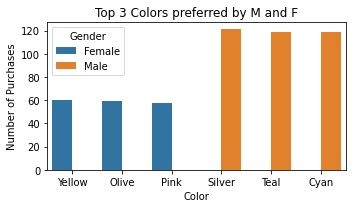

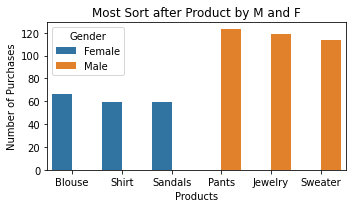

<Figure size 288x216 with 0 Axes>

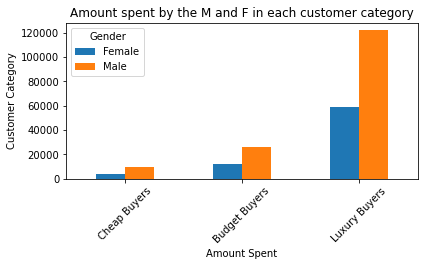

<Figure size 144x216 with 0 Axes>

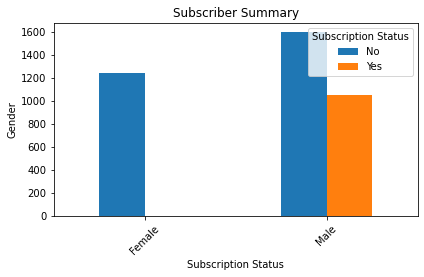

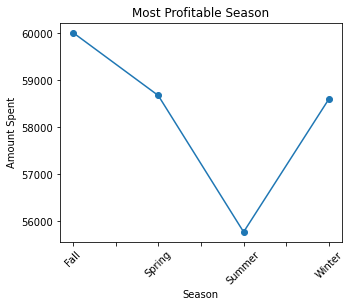

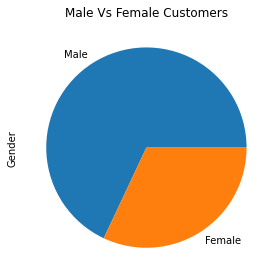

In [58]:
#VISUALIZATION
plt.figure(figsize=(5,3))
sns.barplot(data = top_3, x='Color', y='Count', hue='Gender')
plt.title('Top 3 Colors preferred by M and F')
plt.ylabel('Number of Purchases')
plt.xlabel('Color')
plt.grid(False)
plt.tight_layout()
plt.show()

#VISUALIZATION
plt.figure(figsize=(5,3))
sns.barplot(data = top_products, x='Product', y='Count', hue='Gender')
plt.title('Most Sort after Product by M and F')
plt.ylabel('Number of Purchases')
plt.xlabel('Products')
plt.grid(False)
plt.tight_layout()
plt.show()

#VISUALIZATION
plt.figure(figsize=(4,3))
CCGP.plot(kind='bar')
plt.title('Amount spent by the M and F in each customer category')
plt.ylabel('Customer Category')
plt.xlabel('Amount Spent')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

#VISUALIZATION
plt.figure(figsize=(2,3))
subs_summary.plot(kind='bar')
plt.title('Subscriber Summary')
plt.ylabel('Gender')
plt.xlabel('Subscription Status')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

#VISUALIZATION
plt.figure(figsize=(5,4))
GSP.plot(kind='line',marker='o')
plt.title('Most Profitable Season')
plt.ylabel('Amount Spent')
plt.xlabel('Season')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

#VISUALIZATION
plt.figure(figsize=(5,4))
COUNT.plot(kind='pie')
plt.title('Male Vs Female Customers')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Here, we have displayed the most SORT AFTER product which also doubles as the product that generates the highest revenue, while also showing the most popular colors among the male and female customers

In [94]:
#Repurchase status by Gender
frq_summary = pd.crosstab(r['Frequency of Purchases'], r['Gender'])
print("\nRepurchase status by Gender:")
print(frq_summary)


Repurchase status by Gender:
Gender                  Female  Male
Frequency of Purchases              
Annually                   185   387
Bi-Weekly                  188   359
Every 3 Months             186   398
Fortnightly                163   379
Monthly                    185   368
Quarterly                  169   394
Weekly                     172   367


In [236]:
#Average
Avg_Price_by_Gender = r.groupby('Gender')['Price'].mean().reset_index()
Avg_Price_by_Gender.columns= ['Gender', 'Price']
print("\nAverage Price spent by both Gender:")
print(Avg_Price_by_Gender)

#Total
TR_by_Gender = r.groupby('Gender')['Price'].sum().reset_index()
TR_by_Gender.columns= ['Gender', 'Price']
#TR_by_Gender['TR_by_Gender'] = TR_by_Gender['TR_by_Gender'].apply(lambda x: f"${x:,.2f}")
#f_TR = TR_by_Gender.apply(lambda x: f"${x:,.2f}")
print("\nTotal Revenue generated by both Gender:")
print(TR_by_Gender)


Average Price spent by both Gender:
   Gender      Price
0  Female  60.249199
1    Male  59.536199

Total Revenue generated by both Gender:
   Gender   Price
0  Female   75191
1    Male  157890


The amount spent on average tells us which gender has the more expensive products and from this analysis, we can see that it is the women. Although women buy more expensive things, the revenue generated by men will still be more because the number of male customers in significanlty more than that of the female customers

In [137]:
#Predicting if a customer will return based on demographic and shopping behaviour
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
r_encoded = pd.get_dummies(r[['Gender', 'Location', 'Category', 'Color']], drop_first=True)

X= pd.concat([r_encoded, r[['Age', 'Previous Purchases']]], axis =1)
Y= r['Subscription Status']

model = RandomForestClassifier()
model.fit(X, Y)

Y_pred= model.predict(X)
print(classification_report(Y, Y_pred))

importances= pd.Series(model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False).head(10))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00      2847
         Yes       1.00      1.00      1.00      1053

    accuracy                           1.00      3900
   macro avg       1.00      1.00      1.00      3900
weighted avg       1.00      1.00      1.00      3900

Gender_Male           0.156844
Age                   0.155422
Previous Purchases    0.153577
Category_Clothing     0.027819
Category_Footwear     0.017795
Category_Outerwear    0.013255
Color_Cyan            0.009603
Color_Olive           0.009407
Color_Lavender        0.009268
Color_Teal            0.009235
dtype: float64


Because every single customer of HENIS is a returning customer, we can see from our prediction above that the chance of a customer repurchasing is always there.

##### CORRELATION 

First, let's convert the Qualitative data to Quantitative in order to be able to compute the correlation between the 2 variables; PRICE and SUBCRIPTION STATUS. In essence, we want to know if the total amount a person spends on Products has any effect on whether or not they are subscribed. We will also be doing the same for SUBCRIPTION STATUS and DISCOUNT APPLIED

Cramers V rule will be used to compute the correlation QUALITATIVE and QUANTITATIVE variables while PEARSON'S correlation will be used strictly for QUANTITATIVE variables. Another option in pace of Cramers V rule can be to convert the Qualitative data to Quantitative in order to be able to compute the PEARSON'S correlation

In [291]:
#Using Cramer's V rule
import scipy.stats as stats
import numpy as np
Contingency_table = pd.crosstab(r['Price'], r['Subcription_Status'])
chi2, p, dof, expected = stats.chi2_contingency(Contingency_table)

n= Contingency_table.sum().sum()
min_dim= min(Contingency_table.shape) -1
Cramers_v =np.sqrt(chi2 / (n*min_dim))
print(round(Cramers_v, 2))

0.16


The result of the Cramers_V above (0.16) shows a NOT SO STRONG or LOW ASSOCIATION between Amount spent on Purchases and the SUBSCRIPTION STATUS of customers. This is to say that the whther a person is subscribed or not, it doesn't affect their spending habit A LOT, it has just a little effect on it.


Cramers_V between Frequency of Purchases and Previous Purchase:
0.11


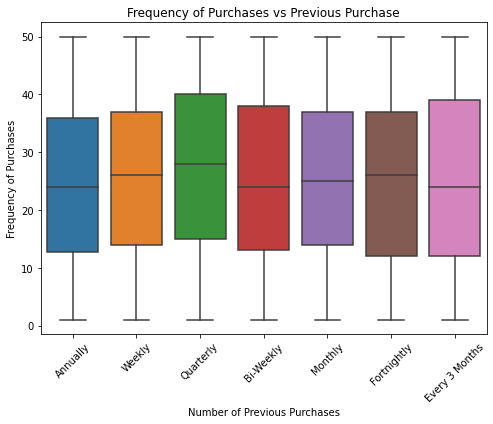

In [301]:
#Using Cramer's V rule
import scipy.stats as stats
import numpy as np
Contingency_TABLE = pd.crosstab(r['Frequency of Purchases'], r['Previous Purchases'])
chi2, p, dof, expected = stats.chi2_contingency(Contingency_TABLE)

n= Contingency_TABLE.sum().sum()
min_dim= min(Contingency_TABLE.shape) -1
CRAMERS_v =np.sqrt(chi2 / (n*min_dim))
print("\nCramers_V between Frequency of Purchases and Previous Purchase:")
print(round(CRAMERS_v, 2))

#BOX PLOT VIZ
plt.figure(figsize=(7,6))
sns.boxplot(x='Frequency of Purchases', y='Previous Purchases', data =r, order= ['Annually', 'Weekly', 'Quarterly', 'Bi-Weekly', 
                                                                                 'Monthly', 'Fortnightly', 'Every 3 Months'])
plt.title('Frequency of Purchases vs Previous Purchase')
plt.ylabel('Frequency of Purchases')
plt.xlabel('Number of Previous Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the viz above, we can see that the Medians(middle line in each box plot) for each group hovers around the mid-20s to high-20s and this indicates (1)A FAIRLY CONSISTENT median purchase frequency, (2)None of the Previous Purchase categories stands out as being linked to significantly HIGHER OR LOWER purchase frequencies. For HENIS, this means that CUSTOMER BEHAVIOUR is DIVERSE even when they are within the same previous purchase group and so impelementing "Blanket" strategies for customer retention might not work. The best bet will be to tailor strategies that speak to the social status of these customers and we have already created such called CUSTOMER CATEGORY.


Cramers_V between Frequency of Purchases and subscription status:
0.03


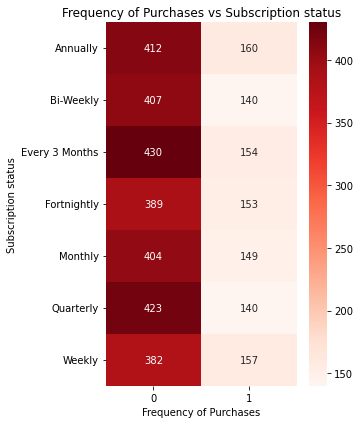

In [313]:
#Using Cramer's V rule
contingency_table = pd.crosstab(r['Frequency of Purchases'], r['Subcription_Status'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

n= contigency_table.sum().sum()
min_dim= min(contingency_table.shape) -1
cramers_v =np.sqrt(chi2 / (n*min_dim))
print("\nCramers_V between Frequency of Purchases and subscription status:")
print(round(cramers_v, 2))

#HEAT MAP
plt.figure(figsize=(5,6))
sns.heatmap(contingency_table, annot =True, cmap='Reds', fmt='d')

plt.title('Frequency of Purchases vs Subscription status')
plt.ylabel('Subscription status')
plt.xlabel('Frequency of Purchases')
plt.tight_layout()
plt.show()

The result of the Cramers_V above (0.03) shows a VERY WEAK or NO ASSOCIATION between Frequency of Purchases and subscription status. In other words, SUBCRIBING doesn't clearly influence how often a customer purchases.
The HEAT MAP tells us that HENIS has more of NON-SUBSCRIBERS(0) than it does SUBSCRIBERS(1) across all frequencies, regardless of how often they shop. So HENIS should consider creating INCENTIVES to increase their number os susbcribers. The Ideal kind of INCENTIVE to create is one that gives higher or certain DISCOUNTS or freebies to SUBSCRIBERS, it should be targeted specifically at showing PREFERENCE to SUBSCRIBERS in a way that entices more of their UNSUBSCRIBED CUSTOMERS. A good example of this can be (1)LOWER SHIPPING FEE OR (2)FASTER SHIPPING for SUBSCRIBED CUSTOMERS. This particular approach would work best especially for the QUATERLY and EVERT 3 MONTHS subscribers because they already shop a lot, it shouldn't take a lot to convince them to subscribe. 
Another thing this analysis tell su is that, maybe the issue is with the MARKETING FOR THE SUBSCRIPTION PROGRAM and it should be evaluated with strategic changes being made to it. It is also note worthy that SEGMENTATION is the best approach for HENIS to deal with her CUSTOMERS

Effect of Discount on Amount Purchased:
0.02


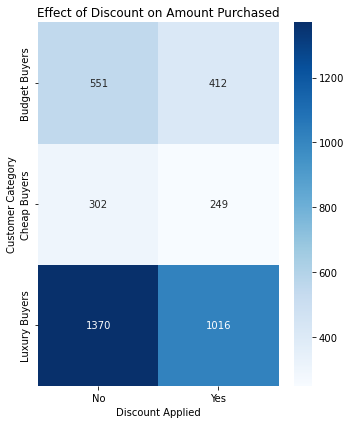

In [323]:
CONtingency_table = pd.crosstab(r['Customer_Category'], r['Discount Applied'])
chi2, p, dof, expected = stats.chi2_contingency(CONtingency_table)

n= CONtingency_table.sum().sum()
min_dim= min(CONtingency_table.shape) -1
CRamers_v =np.sqrt(chi2 / (n*min_dim))
print("Effect of Discount on Amount Purchased:")
print(round(CRamers_v, 2))

#HEAT MAP
plt.figure(figsize=(5,6))
sns.heatmap(CONtingency_table, annot =True, cmap='Blues', fmt='d')

plt.title('Effect of Discount on Amount Purchased')
plt.ylabel('Customer Category')
plt.xlabel('Discount Applied')
plt.tight_layout()
plt.show()

The result of the Cramers_V above (0.14) shows a NOT SO STRONG or LOW ASSOCIATION between Discount Applied and Amount spent on Purchases. That is to say, overall, giving out DISCOUNTS to customers actually affects their the amount of things they purchases, but not so much or in a dramatic way.
The HEAT AMP above shows different CUSTOMER CATEGORIES(segmented by spending behaviour) respond to discount and we see that LUXURY BUYERS dominate overall(whether or not discounts were applied), in fact most purchases by LUXURY buyers, no discounts were applied and this means that DISCOUNTS are not necessary to drive sales for LUXURY buyers and this makes perfect analytical sense because LUXURY buyers are perceived to be the richest categories of HENIS' customers. The BUDGET BUYERS are the most responsive to DISCOUNTS, even though this is not the major factor determining their constant patronage, possibly with factors like QUALITY of product pating a huge role in their decision. 
As for the CHEAP buyers, DISCOUNT does not really move the needle for them, possible because even with the discount on some high-end products, they are still not able to afford it and so they should be targeted differently maybe with things like stocking up more affordable alternatives to some high-end products.

0.04


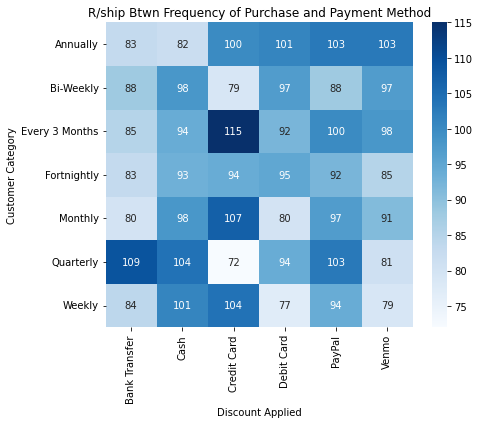

In [320]:
CONTINGENCY_table = pd.crosstab(r['Frequency of Purchases'], r['Payment Method'])
chi2, p, dof, expected = stats.chi2_contingency(CONTINGENCY_table)

n= CONTINGENCY_table.sum().sum()
min_dim= min(CONTINGENCY_table.shape) -1
CRAMERS_v =np.sqrt(chi2 / (n*min_dim))
print(round(CRAMERS_v, 2))

#HEAT MAP
plt.figure(figsize=(7,6))
sns.heatmap(CONTINGENCY_table, annot =True, cmap='Blues', fmt='d')

plt.title('R/ship Btwn Frequency of Purchase and Payment Method')
plt.ylabel('Customer Category')
plt.xlabel('Discount Applied')
plt.tight_layout()
plt.show()

PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: Payment Method, dtype: int64


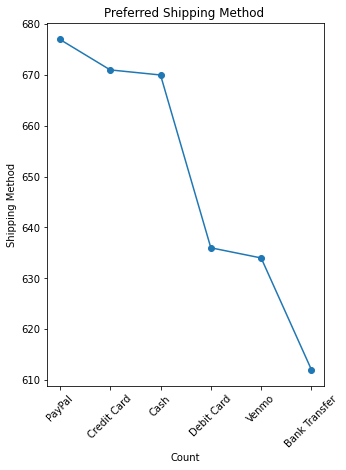

In [321]:
B =r['Payment Method']. value_counts()
print(B)

#visualization
plt.figure(figsize=(5,6))
B.plot(kind='line',marker='o')
plt.title('Preferred Shipping Method ')
plt.ylabel('Shipping Method')
plt.xlabel('Count')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [288]:
#Compute the Pearson Correlation
correlation_1 = r[['Review Rating', 'Price']].corr().iloc[0,1]
print(f"Correlation Between Review Rating and Amount Spent:")
print(round(correlation_1,4))

Correlation Between Review Rating and Amount Spent:
0.0308


For the correlation computed between Review Rating and Amount Spent (0.0308), although positive, it is very weak and this means that the amount customers spend does not exactly guarantee satisfaction to them 

<AxesSubplot:title={'center':'Feature Importance on Review Ratings'}>

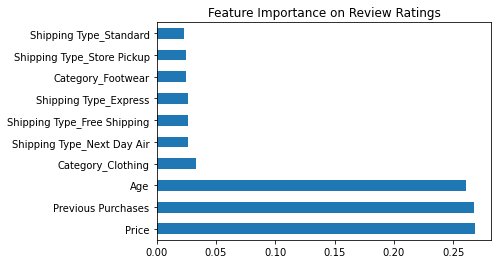

In [147]:
from sklearn.ensemble import RandomForestRegressor
r_encoded = pd.get_dummies(r[['Category', 'Shipping Type']], drop_first=True)
x = pd.concat([r_encoded, r[['Price', 'Age', 'Previous Purchases']]], axis =1)
y =r['Review Rating']

model = RandomForestRegressor(random_state=42)
model.fit(x, y)

importances= pd.Series(model.feature_importances_, index=x.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh', title='Feature Importance on Review Ratings')

This shows the top influencers of Customer's review ratings.

Preffered Shipping Method:
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: Shipping Type, dtype: int64


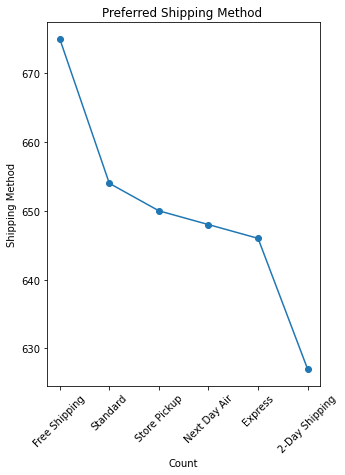

In [324]:
R =r['Shipping Type']. value_counts()
print("Preffered Shipping Method:")
print(R)

#
plt.figure(figsize=(5,6))
R.plot(kind='line',marker='o')
plt.title('Preferred Shipping Method ')
plt.ylabel('Shipping Method')
plt.xlabel('Count')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

This shows the most preffered payment method for customers

In [181]:
import pandas as pd
PREF = r.groupby('Customer_Category')['Shipping Type'].agg(lambda x: x.mode().iloc[0])
print("\nShipping Methods preferred by the different Customers:")
print(PREF)


Shipping Methods preferred by the different Customers:
Customer_Category
Cheap Buyers      Next Day Air
Budget Buyers    Free Shipping
Luxury Buyers    Free Shipping
Name: Shipping Type, dtype: object


This shows the shipping method that the different Categories of Customers prefer to use.

In [191]:
#Saving the updated csv file
import pandas as pd
r.to_csv('CUSTOMER SUBSCRIPTION.csv', index=False)

r=pd.read_csv('CUSTOMER SUBSCRIPTION.csv')
r

,Customer ID,Age,Gender,Product,Category,Price,Location,Size,Color,Season,...,Frequency of Purchases,Customer_Segment,Customer_Category,Age group,Z_Purchase,Segment Label,Subcription_Status,Discount_applied,Promo_Used,promo_clean
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Fortnightly,0,Luxury Buyers,Older Adult,-0.785831,Budget,1,1,1,Yes
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Fortnightly,1,Luxury Buyers,Teenager,-1.616552,Loyal Big,1,1,1,Yes
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Weekly,0,Luxury Buyers,Adult,-0.162789,Budget,1,1,1,Yes
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Weekly,2,Luxury Buyers,Young adult,1.637107,Occasional,1,1,1,Yes
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Annually,0,Budget Buyers,Adult,0.391025,Budget,1,1,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,...,Weekly,2,Cheap Buyers,Young adult,0.460252,Occasional,0,0,0,No
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,...,Bi-Weekly,0,Budget Buyers,Older Adult,1.083293,Budget,0,0,0,No
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,...,Quarterly,0,Budget Buyers,Adult,-0.093563,Budget,0,0,0,No
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,...,Weekly,1,Luxury Buyers,Adult,-0.093563,Loyal Big,0,0,0,No
